In [37]:
import numpy as np

N = 1000000
tau = 10 # average minutes between arrivals

rand = np.random.RandomState(42)

    bus_arrival_times = N*tau*np.sort(rand.rand(N)) # map random number into real time 


In [38]:
intervals = np.diff(bus_arrival_times)
intervals.mean()

np.float64(9.99998796015184)

In [39]:
def simulate_wait_times(arrival_times,rssed=8675309,n_passengers=1000000):
    rand = np.random.RandomState(rssed)
    
    arrival_times = np.asarray(arrival_times)
    passenger_times = arrival_times.max()*rand.rand(n_passengers)
    
    # find the index of the next bus for each simulated passenger
    
    i = np.searchsorted(arrival_times, passenger_times,side="right")
    
    return arrival_times[i]-passenger_times

In [40]:
wait_times = simulate_wait_times(bus_arrival_times)
wait_times.mean()

np.float64(10.001584206227317)

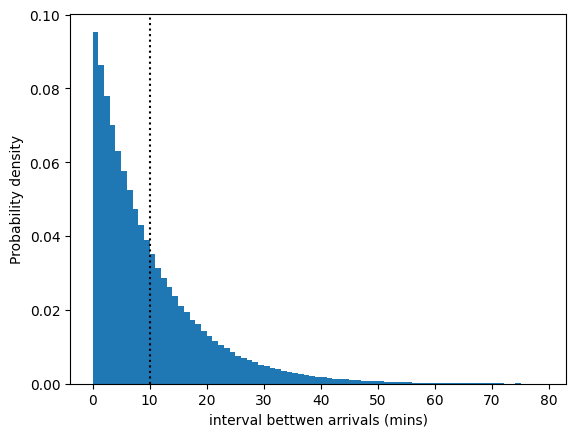

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(intervals,bins=np.arange(80),density=True)
plt.axvline(intervals.mean(),color="black",linestyle='dotted')
plt.xlabel("interval bettwen arrivals (mins)")
plt.ylabel("Probability density")
plt.show()

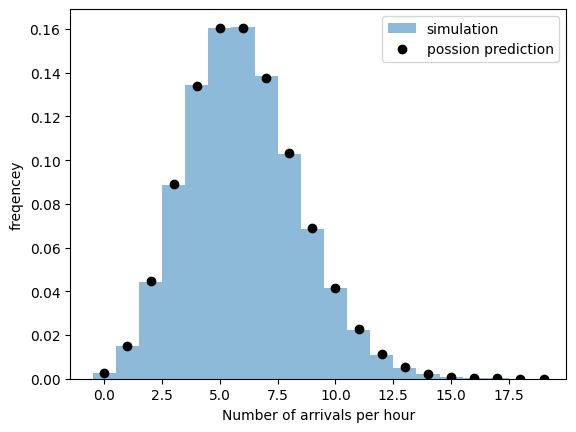

In [42]:
from scipy.stats import poisson

binsize=60
binned_arrivals = np.bincount((bus_arrival_times//binsize).astype(int))  ## this we count the number of car in each time 

x=np.arange(20)

## see the difference bettwen poisson distribution and arrival time process (in count process)
plt.hist(binned_arrivals,bins=x-0.5,density=True, alpha=0.5,label='simulation')
plt.plot(x,poisson(binsize/tau).pmf(x),'ok',label='possion prediction')
plt.xlabel('Number of arrivals per hour')
plt.ylabel('freqencey')
plt.legend()


In [43]:
### the assumption is accept if arrivale time distribution(count process) is possion distribution



In [44]:
import pandas as pd
path=r"C:\Users\84280\Desktop\lianxi\arrival_times.csv"
df=pd.read_csv(path)
df

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM
0,2016-03-26,6201,673,S,30908177,431,3RD AVE & PIKE ST (431),01:11:57,01:13:19
1,2016-03-26,6201,673,S,30908033,431,3RD AVE & PIKE ST (431),23:19:57,23:16:13
2,2016-03-26,6201,673,S,30908028,431,3RD AVE & PIKE ST (431),21:19:57,21:18:46
3,2016-03-26,6201,673,S,30908019,431,3RD AVE & PIKE ST (431),19:04:57,19:01:49
4,2016-03-26,6201,673,S,30908252,431,3RD AVE & PIKE ST (431),16:42:57,16:42:39
...,...,...,...,...,...,...,...,...,...
39152,2016-05-27,6215,674,N,30905957,578,3RD AVE & PIKE ST (578),10:50:25,10:49:50
39153,2016-05-27,6215,674,N,30905720,578,3RD AVE & PIKE ST (578),13:02:27,13:07:10
39154,2016-05-27,6215,674,N,30905729,578,3RD AVE & PIKE ST (578),15:14:29,15:15:55
39155,2016-05-27,6215,674,N,30905740,578,3RD AVE & PIKE ST (578),17:26:29,17:25:40


In [45]:
print(df.columns)
print(df.isnull().any())

Index(['OPD_DATE', 'VEHICLE_ID', 'RTE', 'DIR', 'TRIP_ID', 'STOP_ID',
       'STOP_NAME', 'SCH_STOP_TM', 'ACT_STOP_TM'],
      dtype='object')
OPD_DATE       False
VEHICLE_ID     False
RTE            False
DIR            False
TRIP_ID        False
STOP_ID        False
STOP_NAME      False
SCH_STOP_TM     True
ACT_STOP_TM    False
dtype: bool


In [46]:
print(df.SCH_STOP_TM.isnull().sum())

240


In [47]:
df=df.dropna()

In [48]:
df['scheduled']=pd.to_datetime(df['OPD_DATE']+' '+df['SCH_STOP_TM'])
df['acutal']=pd.to_datetime(df['OPD_DATE']+' '+df['ACT_STOP_TM'])

minute=np.timedelta64(1,'m')
hour = 60*minute

diff_hrs=(df['acutal']-df['scheduled'])/hour

C:\Users\84280\AppData\Local\Temp\ipykernel_18488\2996858014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scheduled']=pd.to_datetime(df['OPD_DATE']+' '+df['SCH_STOP_TM'])
C:\Users\84280\AppData\Local\Temp\ipykernel_18488\2996858014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acutal']=pd.to_datetime(df['OPD_DATE']+' '+df['ACT_STOP_TM'])


In [49]:
df.loc[diff_hrs<-20]

,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,scheduled,acutal
239,2016-03-26,6115,674,S,30908163,431,3RD AVE & PIKE ST (431),23:59:58,00:02:35,2016-03-26 23:59:58,2016-03-26 00:02:35
1846,2016-03-28,6201,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:03:56,2016-03-28 23:59:58,2016-03-28 00:03:56
1888,2016-03-29,6044,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:06:32,2016-03-29 23:59:58,2016-03-29 00:06:32
2050,2016-03-30,6075,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:00:15,2016-03-30 23:59:58,2016-03-30 00:00:15
2178,2016-03-31,6110,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:04:18,2016-03-31 23:59:58,2016-03-31 00:04:18
2278,2016-04-01,6067,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:03:02,2016-04-01 23:59:58,2016-04-01 00:03:02
2415,2016-04-02,6209,674,S,30908163,431,3RD AVE & PIKE ST (431),23:59:58,00:02:49,2016-04-02 23:59:58,2016-04-02 00:02:49
3302,2016-04-08,6065,675,S,30906306,431,3RD AVE & PIKE ST (431),23:53:59,00:04:25,2016-04-08 23:53:59,2016-04-08 00:04:25
3931,2016-04-03,6200,674,S,30909469,431,3RD AVE & PIKE ST (431),23:59:58,00:03:03,2016-04-03 23:59:58,2016-04-03 00:03:03
3992,2016-04-04,6088,674,S,30905827,431,3RD AVE & PIKE ST (431),23:59:58,00:00:22,2016-04-04 23:59:58,2016-04-04 00:00:22


In [50]:
df.loc[diff_hrs<-20,"acutal"]+=24*hour
df.loc[diff_hrs>20,"acutal"]-=24*hour
df['minutes_late']=(df['acutal']-df['scheduled'])/minute
df['route']=df['RTE'].replace({673:"C",674:"D",675:"E"}).astype("category")
df["direction"]=df['DIR'].replace({"N":"Northbound","S":"southbound"}).astype("category")


dfcopy=df[["route","direction","scheduled","minutes_late"]].copy()


C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3578364290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minutes_late']=(df['acutal']-df['scheduled'])/minute
C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3578364290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route']=df['RTE'].replace({673:"C",674:"D",675:"E"}).astype("category")
C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3578364290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [51]:
dfcopy

,route,direction,scheduled,minutes_late
0,C,southbound,2016-03-26 01:11:57,1.366667
1,C,southbound,2016-03-26 23:19:57,-3.733333
2,C,southbound,2016-03-26 21:19:57,-1.183333
3,C,southbound,2016-03-26 19:04:57,-3.133333
4,C,southbound,2016-03-26 16:42:57,-0.300000
...,...,...,...,...
39152,D,Northbound,2016-05-27 10:50:25,-0.583333
39153,D,Northbound,2016-05-27 13:02:27,4.716667
39154,D,Northbound,2016-05-27 15:14:29,1.433333
39155,D,Northbound,2016-05-27 17:26:29,-0.816667


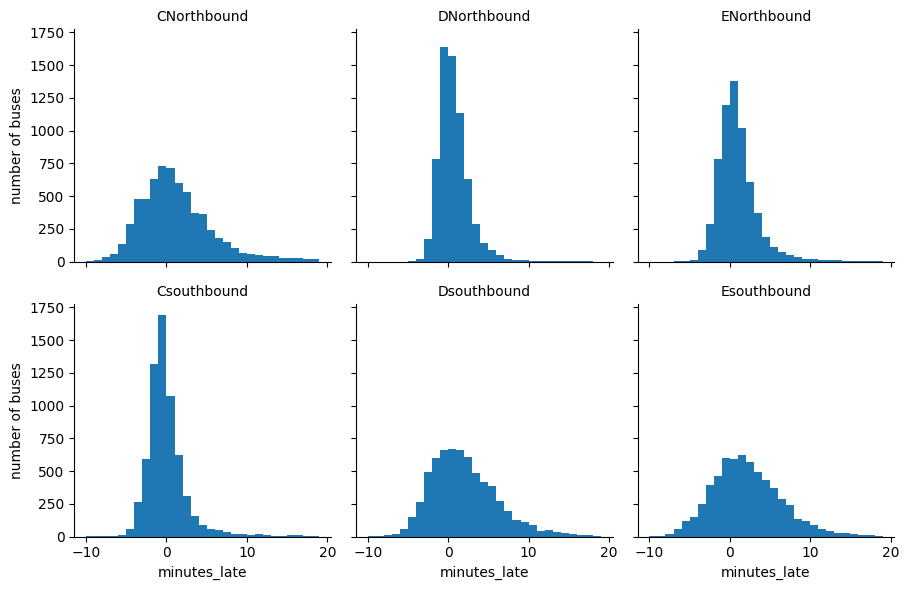

In [52]:
import seaborn as sns

g=sns.FacetGrid(dfcopy,row="direction",col="route")
g.map(plt.hist,"minutes_late",bins=np.arange(-10,20))
g.set_titles('{col_name}{row_name}')
g.set_axis_labels('minutes_late','number of buses')

In [53]:
def compute_headway(scheduled):
    minute=np.timedelta64(1,"m")
    return scheduled.sort_values().diff()/minute


In [54]:
grouped = df.groupby(['route','direction'])

C:\Users\84280\AppData\Local\Temp\ipykernel_18488\2344091036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['route','direction'])


In [55]:
grouped.apply(lambda x:x)

C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3682872173.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x:x)


OPD_DATE  VEHICLE_ID  RTE DIR   TRIP_ID  STOP_ID  \
route direction                                                              
C     Northbound 19471  2016-03-26        6201  673   N  30907967      578   
                 19472  2016-03-26        6201  673   N  30908199      578   
                 19473  2016-03-26        6201  673   N  30907959      578   
                 19474  2016-03-26        6201  673   N  30907950      578   
                 19475  2016-03-26        6201  673   N  30908227      578   
...                            ...         ...  ...  ..       ...      ...   
E     southbound 14451  2016-04-10        6041  675   S  30909864      431   
                 14452  2016-04-10        6041  675   S  30909831      431   
                 14453  2016-04-10        6041  675   S  30909859      431   
                 14454  2016-04-10        6041  675   S  30909856      431   
                 14455  2016-04-10        6041  675   S  30909824      431   

                                      STOP_NAME SCH_STOP_TM ACT_STOP_TM  \
route direction                                                           
C     Northbound 19471  3RD AVE & PIKE ST (578)    00:30:25    00:30:19   
                 19472  3RD AVE & PIKE ST (578)    22:45:25    22:44:53   
                 19473  3RD AVE & PIKE ST (578)    20:30:25    20:34:18   
                 19474  3RD AVE & PIKE ST (578)    18:15:28    18:15:37   
                 19475  3RD AVE & PIKE ST (578)    15:51:28    15:48:59   
...                                         ...         ...         ...   
E     southbound 14451  3RD AVE & PIKE ST (431)    14:59:59    14:55:56   
                 14452  3RD AVE & PIKE ST (431)    12:29:59    12:29:39   
                 14453  3RD AVE & PIKE ST (431)    09:53:59    09:57:18   
                 14454  3RD AVE & PIKE ST (431)    07:41:59    07:38:53   
                 14455  3RD AVE & PIKE ST (431)    05:40:59    05:38:54   

                                 scheduled              acutal  minutes_late  \
route direction                                                                
C     Northbound 19471 2016-03-26 00:30:25 2016-03-26 00:30:19     -0.100000   
                 19472 2016-03-26 22:45:25 2016-03-26 22:44:53     -0.533333   
                 19473 2016-03-26 20:30:25 2016-03-26 20:34:18      3.883333   
                 19474 2016-03-26 18:15:28 2016-03-26 18:15:37      0.150000   
                 19475 2016-03-26 15:51:28 2016-03-26 15:48:59     -2.483333   
...                                    ...                 ...           ...   
E     southbound 14451 2016-04-10 14:59:59 2016-04-10 14:55:56     -4.050000   
                 14452 2016-04-10 12:29:59 2016-04-10 12:29:39     -0.333333   
                 14453 2016-04-10 09:53:59 2016-04-10 09:57:18      3.316667   
                 14454 2016-04-10 07:41:59 2016-04-10 07:38:53     -3.100000   
                 14455 2016-04-10 05:40:59 2016-04-10 05:38:54     -2.083333   

                       route   direction  
route direction                           
C     Northbound 19471     C  Northbound  
                 19472     C  Northbound  
                 19473     C  Northbound  
                 19474     C  Northbound  
                 19475     C  Northbound  
...                      ...         ...  
E     southbound 14451     E  southbound  
                 14452     E  southbound  
                 14453     E  southbound  
                 14454     E  southbound  
                 14455     E  southbound  

[38917 rows x 14 columns]

In [56]:
df["acutal_interval"]=grouped['acutal'].transform(compute_headway)
df["schedualed_interval"]=grouped["scheduled"].transform(compute_headway)

C:\Users\84280\AppData\Local\Temp\ipykernel_18488\1241980702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["acutal_interval"]=grouped['acutal'].transform(compute_headway)
C:\Users\84280\AppData\Local\Temp\ipykernel_18488\1241980702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["schedualed_interval"]=grouped["scheduled"].transform(compute_headway)


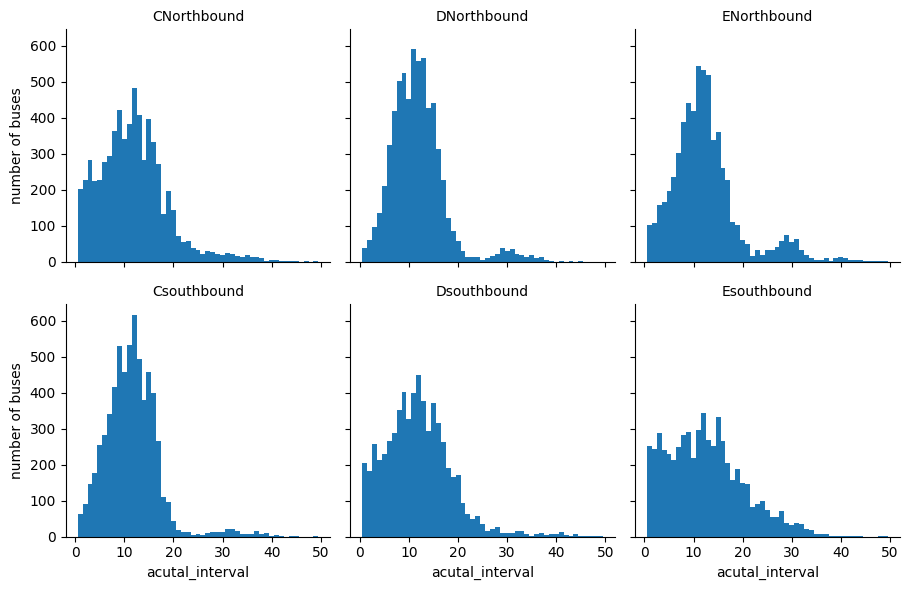

In [57]:
g=sns.FacetGrid(df,row="direction",col="route")
g.map(plt.hist,"acutal_interval",bins=np.arange(50)+0.5)
g.set_titles("{col_name}{row_name}")
g.set_axis_labels("acutal_interval","number of buses")

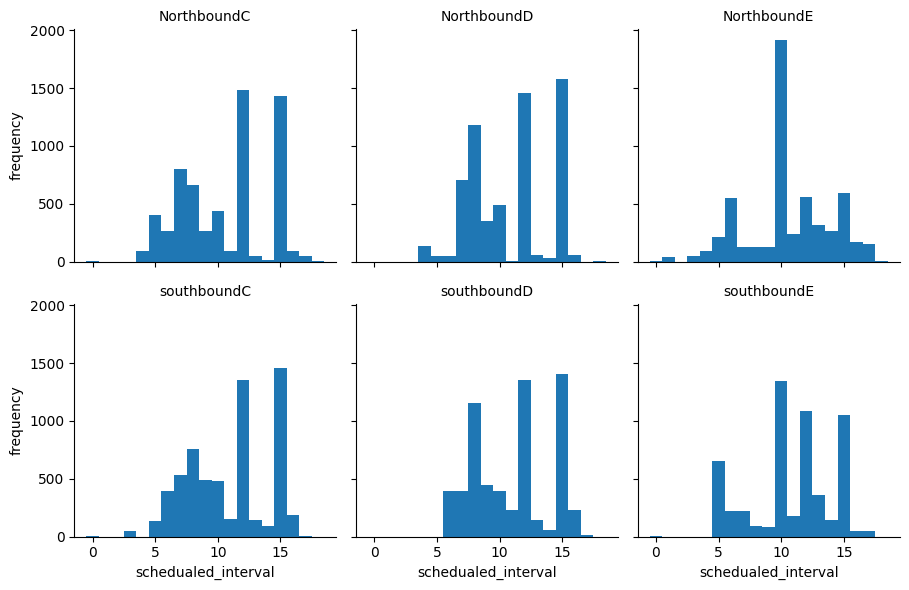

In [58]:
g=sns.FacetGrid(df,row="direction",col="route")
g.map(plt.hist,"schedualed_interval",bins=np.arange(20)-0.5)
g.set_titles("{row_name}{col_name}")
g.set_axis_labels("schedualed_interval","frequency")

In [76]:
def stack_sequence(data):
    
    data=data.sort_values("scheduled")
    
    data['scheduled']=data['schedualed_interval'].cumsum()
    data['acutal']=data['scheduled']+data['minutes_late'] # the stack of actual arrivaing time 
    data['acutal_interval']=data['acutal'].sort_values().diff()
    
    return data

subset = df[df.schedualed_interval.isin([10,12,15])] # select some group to se the feature, the nearest data is wanted 
grouped = subset.groupby(['route','direction','schedualed_interval'])  #
sequenced = grouped.apply(stack_sequence).reset_index(drop=True)
sequenced.head()

    

C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3826722873.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby(['route','direction','schedualed_interval'])  #
C:\Users\84280\AppData\Local\Temp\ipykernel_18488\3826722873.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sequenced = grouped.apply(stack_sequence).reset_index(drop=True)


,OPD_DATE,VEHICLE_ID,RTE,DIR,TRIP_ID,STOP_ID,STOP_NAME,SCH_STOP_TM,ACT_STOP_TM,scheduled,acutal,minutes_late,route,direction,acutal_interval,schedualed_interval
0,2016-03-28,6076,673,N,30905844,578,3RD AVE & PIKE ST (578),06:10:25,06:12:33,10.0,12.133333,2.133333,C,Northbound,NaN,10.0
1,2016-03-28,6065,673,N,30905934,578,3RD AVE & PIKE ST (578),06:20:25,06:23:03,20.0,22.633333,2.633333,C,Northbound,10.500000,10.0
2,2016-03-28,6070,673,N,30905892,578,3RD AVE & PIKE ST (578),09:35:28,09:39:49,30.0,34.350000,4.350000,C,Northbound,11.716667,10.0
3,2016-03-28,6059,673,N,30905574,578,3RD AVE & PIKE ST (578),09:45:28,09:42:59,40.0,37.516667,-2.483333,C,Northbound,3.166667,10.0
4,2016-03-28,6082,673,N,30905995,578,3RD AVE & PIKE ST (578),15:34:31,15:33:15,50.0,48.733333,-1.266667,C,Northbound,11.216667,10.0


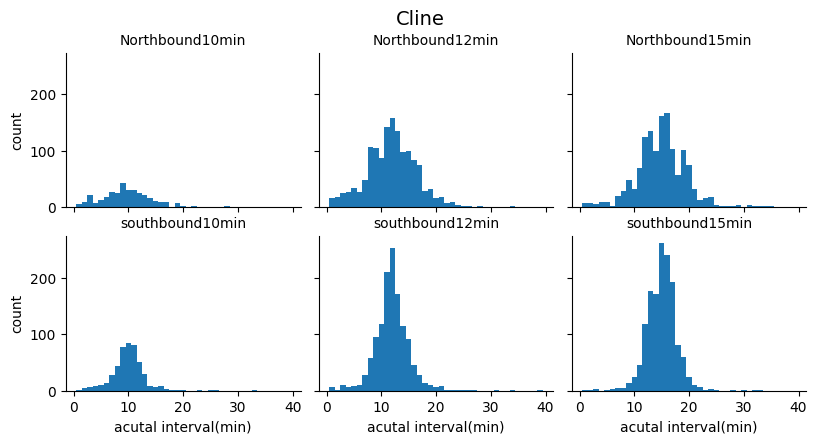

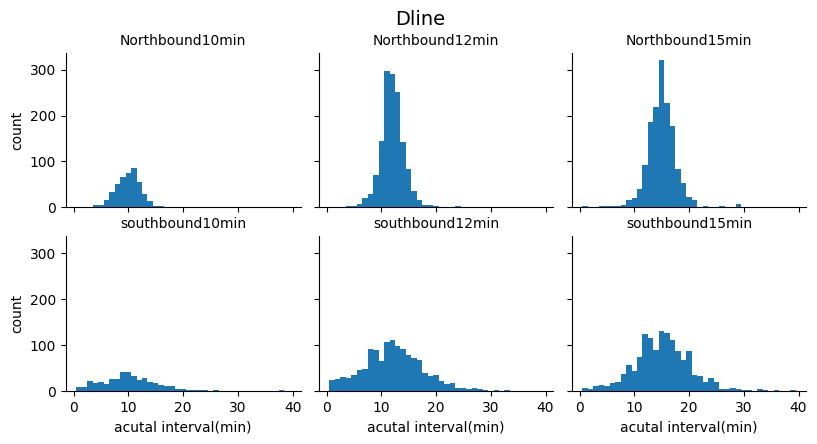

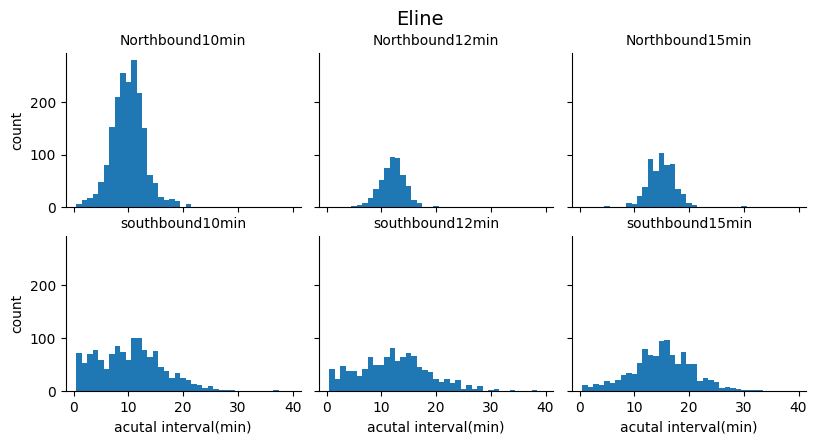

In [77]:
for route in ['C','D','E']:
    g = sns.FacetGrid(sequenced.query(f"route=='{route}'"),row="direction",col="schedualed_interval")
    g.map(plt.hist,"acutal_interval",bins=np.arange(40)+0.5)
    g.set_titles("{row_name}{col_name:.0f}min")
    g.set_axis_labels("acutal interval(min)","count")
    g.fig.set_size_inches(8,4)
    g.fig.suptitle(f"{route}line",y=1.05,fontsize=14)


In [82]:
grouped=sequenced.groupby(['route', 'direction', 'schedualed_interval'])
sims=grouped["acutal"].apply(simulate_wait_times)


C:\Users\84280\AppData\Local\Temp\ipykernel_18488\1466146817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=sequenced.groupby(['route', 'direction', 'schedualed_interval'])


In [83]:
sims

route  direction   schedualed_interval
C      Northbound  10.0                   [10.015690935308612, 6.7085813629078075, 12.78...
                   12.0                   [12.815901311940252, 9.268886535532147, 11.399...
                   15.0                   [16.36432853677252, 10.19852507417636, 12.0427...
       southbound  10.0                   [4.1026596590595545, 2.948366643540794, 3.2876...
                   12.0                   [0.16649721034264076, 8.356423757857556, 1.993...
                   15.0                   [6.234771056177124, 15.1644121487152, 13.42777...
D      Northbound  10.0                   [4.554275765639886, 0.7613619620428835, 2.2432...
                   12.0                   [12.374451105766639, 7.304635359121676, 0.5123...
                   15.0                   [10.359639836842689, 2.2989967395078565, 5.865...
       southbound  10.0                   [6.599918195081045, 5.387216724777318, 19.3111...
                   12.0                  

In [84]:
sims.apply(lambda times:"{0:.1f}+/-{1:.1f}min".format(times.mean(),times.std()))


route  direction   schedualed_interval
C      Northbound  10.0                   7.0+/-5.9min
                   12.0                   7.3+/-5.7min
                   15.0                   8.3+/-5.6min
       southbound  10.0                   5.9+/-4.7min
                   12.0                   6.6+/-4.8min
                   15.0                   7.8+/-4.8min
D      Northbound  10.0                   5.4+/-3.8min
                   12.0                   6.2+/-3.8min
                   15.0                   7.8+/-4.8min
       southbound  10.0                   6.8+/-6.4min
                   12.0                   7.4+/-5.3min
                   15.0                   8.5+/-6.1min
E      Northbound  10.0                   5.5+/-3.6min
                   12.0                   6.2+/-3.9min
                   15.0                   7.8+/-4.9min
       southbound  10.0                   7.0+/-5.3min
                   12.0                   7.9+/-5.8min
                   15.0   